In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
 
import warnings
warnings.filterwarnings('ignore')

Importing the datatset

In [2]:
df=pd.read_csv("winequality-red.csv")
df.shape

(1599, 12)

Dataset contain 1599 rows and 12 columns

In [3]:
df.size

19188

Dataset has 19188 number of elements 

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA**

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All independent variables contain float value and target variable contain integer value

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can clearly see there are no missing value in the dataset.

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Quality varible sccore is ranging from (3 to 8)

In [9]:
# Gives statistical measures of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Univaraite** **Analysis**

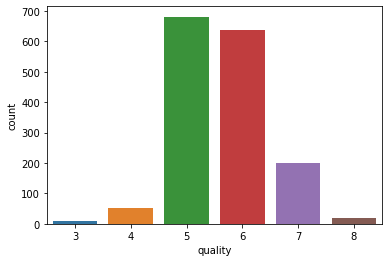

In [10]:
sn.countplot(df['quality'])

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Plotting distribution plot for all independent variables

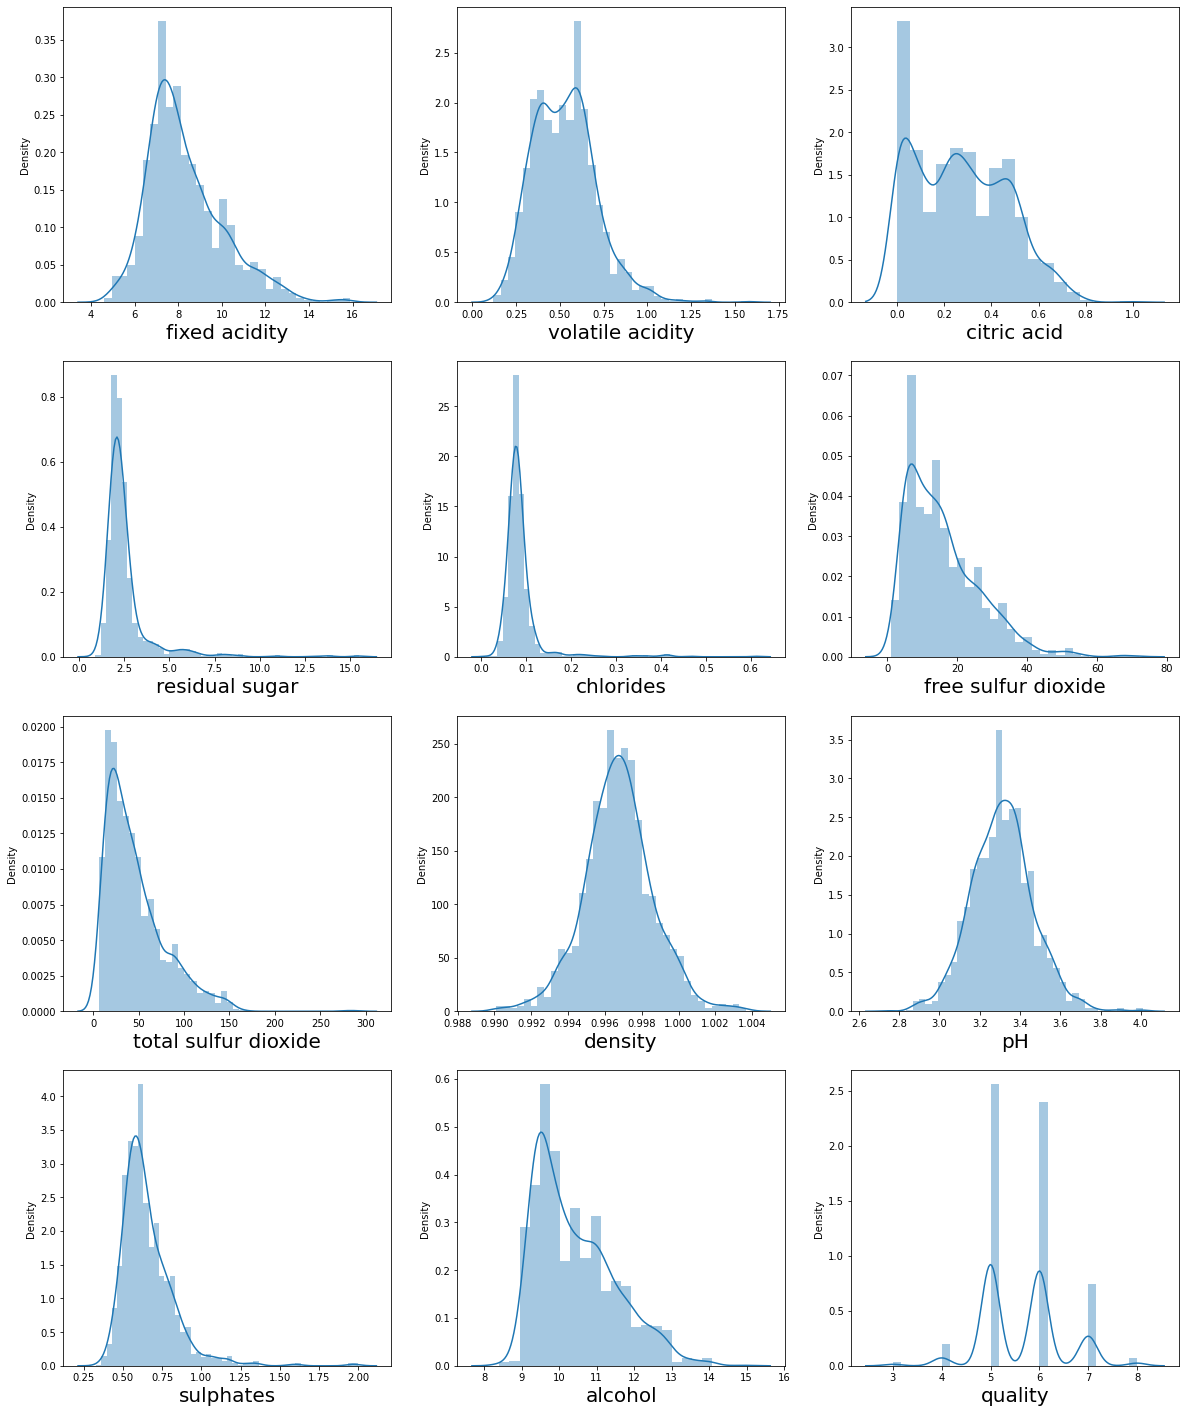

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

1.pH and density variable show normal distribution curve.

2.Residual sugar,chlorides,total suplhur dioxide,sulphates,free sulphur dioxide shows left skewed distribution grpahs.

2.Fixed acidity and Volatile acidity shows apprximately normal distribution plot.

**Identifying Outliers**

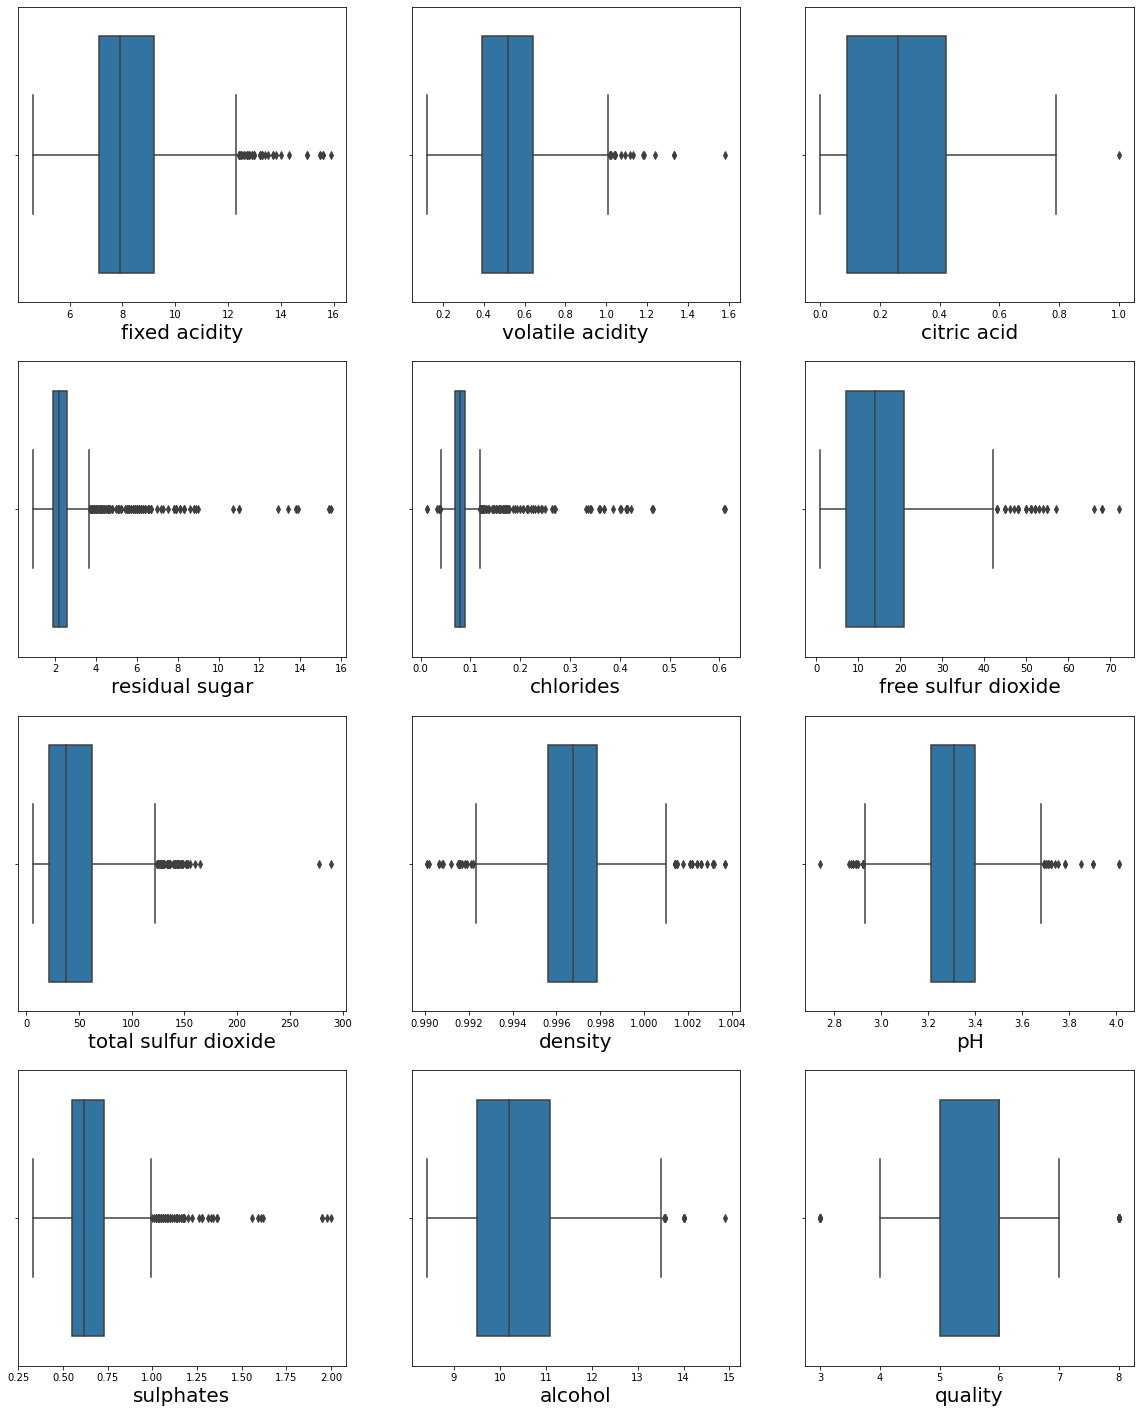

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber=plotnumber+1
plt.show()

Lot of outlier can be seen in the independent variables.

**Bivariate anaylsis**

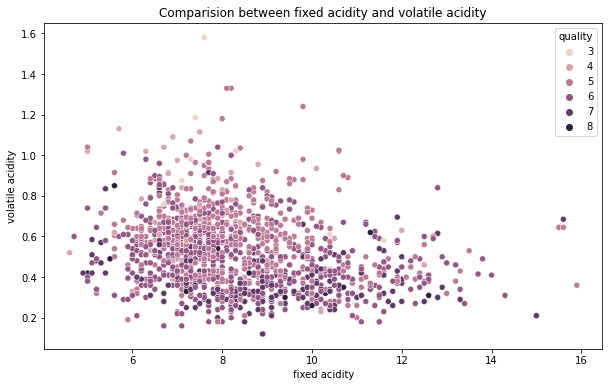

In [15]:
## Plotting the relation between Wine quality and physicochemical (input) variables .
# Just plotted one grpah need to think about it
plt.figure(figsize=[10,6])
plt.title('Comparision between fixed acidity and volatile acidity')
sn.scatterplot(df['fixed acidity'],df['volatile acidity'],hue=df['quality'])

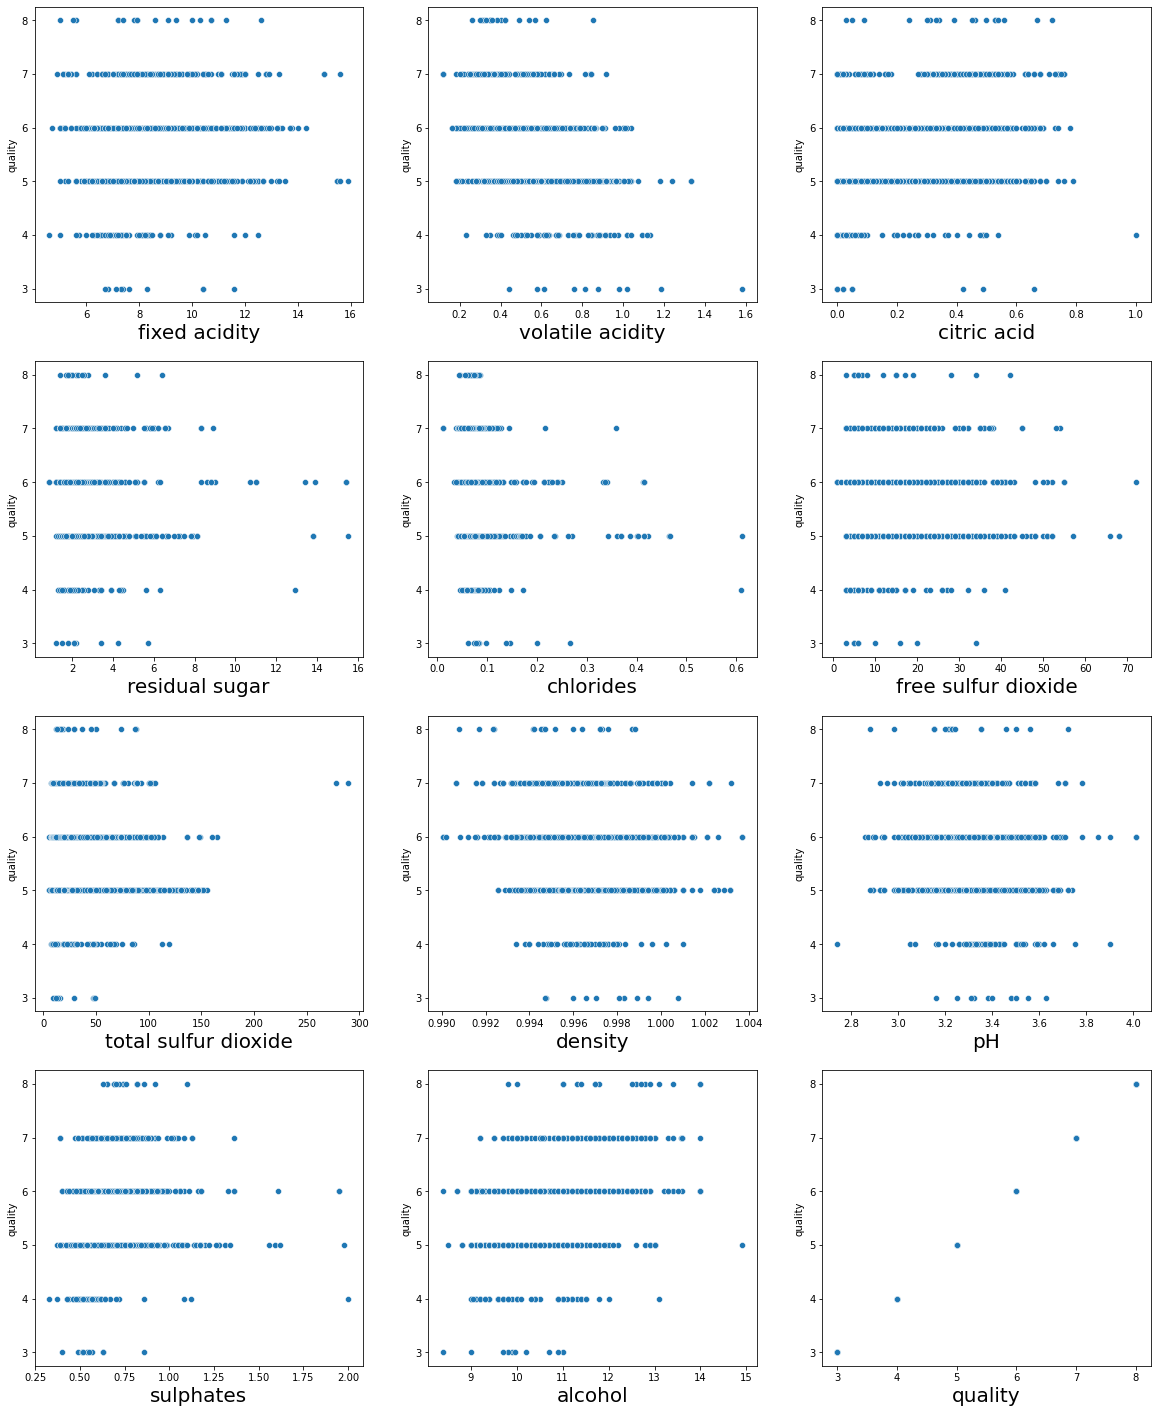

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sn.scatterplot(df[column],df['quality'])
        plt.xlabel(column,fontsize=20)
    plotnumber=plotnumber+1
plt.show()

from the above plots we can clearly see that there is no correlation at all of any single feature directly associating good quality wine.

**Multivariate Anaylsis**

In [17]:
# finding correlation coefficient
cor=df.corr()

In [18]:
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


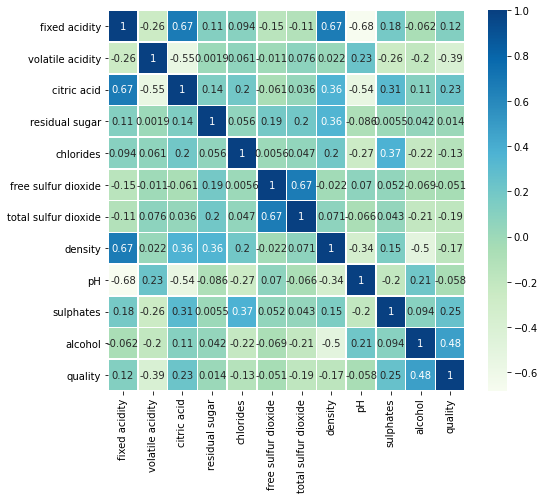

In [19]:
#plotting heatmap
fig, axis = plt.subplots(figsize=(8, 7))
sn.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

Realtionship with qualtity of wine

alcohol shows high correlation of (0.47) with quality of wine.

sulphates and citric acid shows moderate postive linear relationship.

fixed acidity show weak positive linear relationship.

residual sugar shows no correlation at all

free sulfur dioxide,ph,chlorides,density and total sulfur dioxide shows weak neagative relationship.

vloatile acidity shows moderate negative relationship

In [20]:
# Checking the correalation values in descending order
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

**Removing the outlier**

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [22]:
new_df.shape

(1451, 12)

In [23]:
df.shape

(1599, 12)

In [24]:
# Calculating the data loss percentage
loss_percent=(1599-1451)/1599*100
loss_percent

9.255784865540964

Since we are losing data less than 10 percentage so we can remove the outliers.  

**Skewness**

In [25]:
# Chekcking for skewness range 
new_df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

Normal Skewness range is -0.5 to + 0.5 but some of the columns are out of the range.

1.Fixed acidity (0.82)
2.Residual sugar (2.45)
3.chlorides    (2.27)
4.free sulfur dioxide (0.86)
5.total sulfur dioxide (1.18)
6.sulphates (0.89)
7.alcohol (0.75)

In [26]:
# Now we have to apply Log transformation techniques on this four features

#new_df['fixed acidity'] =np.log(new_df['fixed acidity'])
#new_df['residual sugar'] =np.log(new_df['residual sugar'])
#new_df['chlorides'] =np.log(new_df['chlorides'])
#new_df['free sulfur dioxide'] =np.log(new_df['free sulfur dioxide'])
#new_df['total sulfur dioxide']=np.log(new_df['total sulfur dioxide'])
#new_df['sulphates']=np.log(new_df['sulphates'])
#new_df['alcohol']=np.log(new_df['alcohol'])
#Applied log trnasformation technique worked well in this case study.
skewed_factors=['fixed acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']

In [27]:

# Since we are getting NAN values after applying that's why applying the power transformation technique
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[skewed_factors]=scaler.fit_transform(new_df[skewed_factors].values)
# Using 'yeo-johnson' method instead of box-cox because it works only with postive value and not even column having zero value.

In [28]:
new_df.skew()

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
quality                 0.407865
dtype: float64

In [29]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,5
1,-0.170805,0.88,0.00,0.649155,0.986838,1.091561,0.952517,0.9968,3.20,0.451524,-0.530340,5
2,-0.170805,0.76,0.04,0.207601,0.718578,0.238587,0.624244,0.9970,3.26,0.220005,-0.530340,5
3,1.573404,0.28,0.56,-0.610683,-0.207213,0.440493,0.784119,0.9980,3.16,-0.393177,-0.530340,6
4,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,5


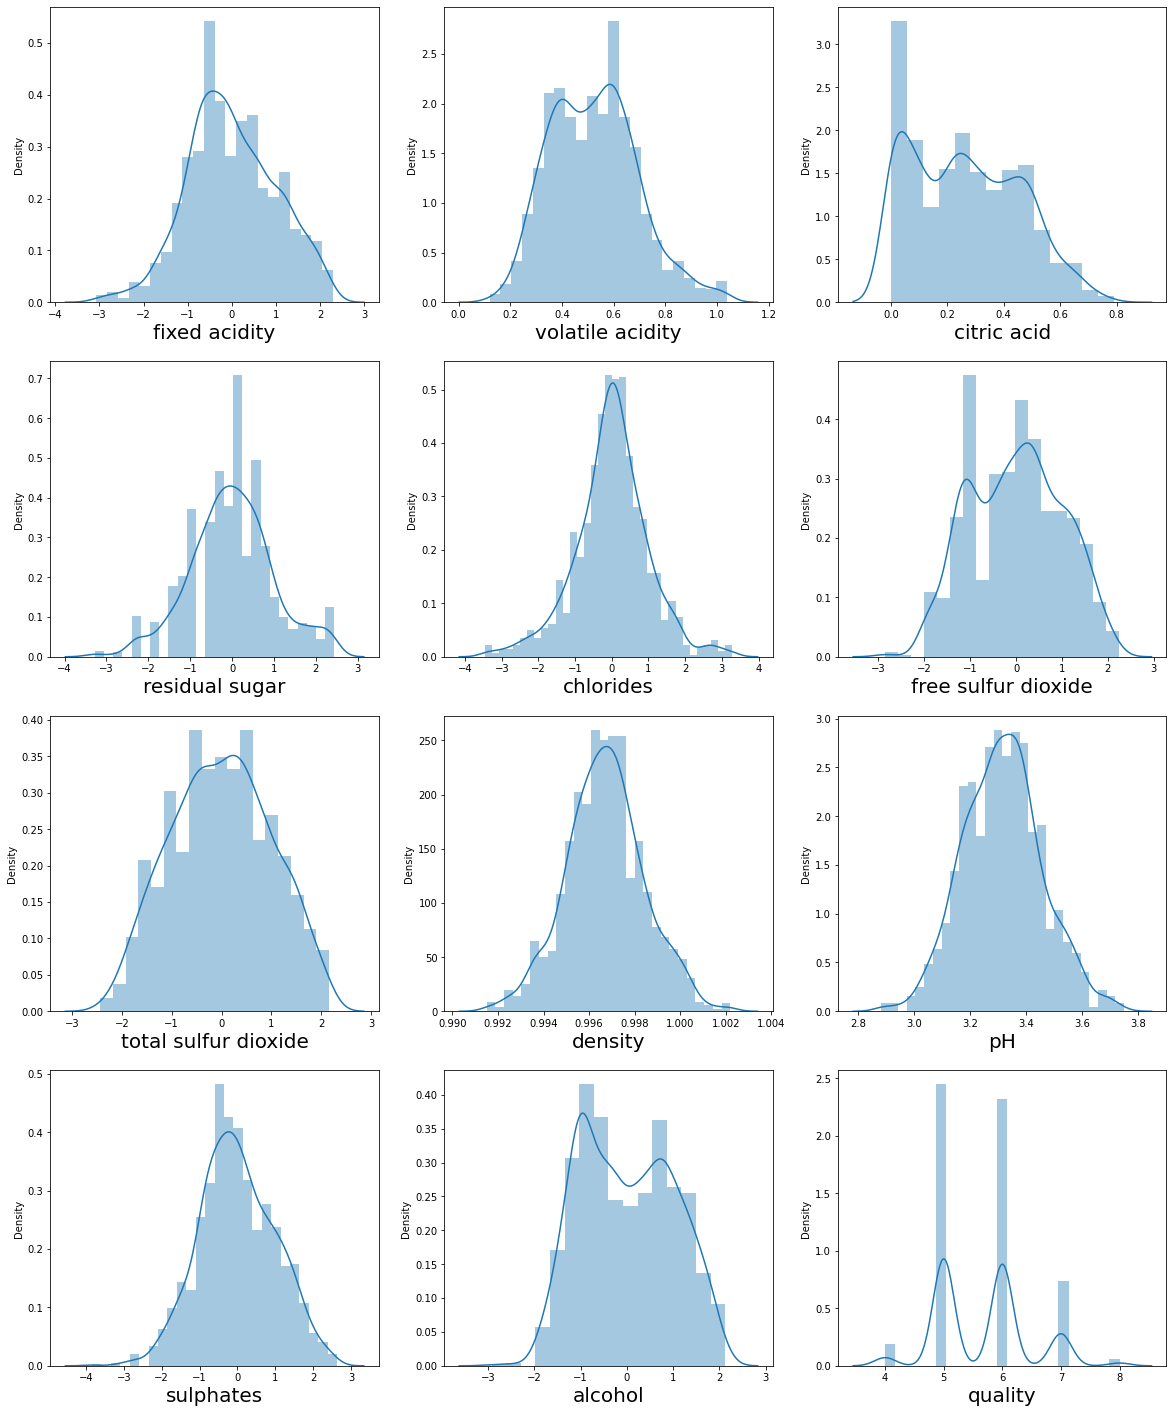

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in new_df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sn.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Since Oultier and skewness both are removed now we can see that all feature or input variables have distribution plot of the data approximately equal to normal distribution plot.

In [31]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
quality = new_df["quality"].values
category = []
for num in quality:
    if num > 6.5:
        category.append('Good')
    else:
        category.append('Bad')

In [33]:
category

['Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 '

In [34]:
new_df['quality']=category

In [35]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,Bad
1,-0.170805,0.88,0.00,0.649155,0.986838,1.091561,0.952517,0.9968,3.20,0.451524,-0.530340,Bad
2,-0.170805,0.76,0.04,0.207601,0.718578,0.238587,0.624244,0.9970,3.26,0.220005,-0.530340,Bad
3,1.573404,0.28,0.56,-0.610683,-0.207213,0.440493,0.784119,0.9980,3.16,-0.393177,-0.530340,Bad
4,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,Bad


In [36]:
new_df['quality'].unique()

array(['Bad', 'Good'], dtype=object)

In [37]:
new_df['quality'].value_counts()

Bad     1250
Good     201
Name: quality, dtype: int64

**Encoding the target variable**

In [38]:
# using label encoder transforming categorical features into  numberical features.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df['quality']=LE.fit_transform(new_df['quality'])


In [39]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,0
1,-0.170805,0.88,0.00,0.649155,0.986838,1.091561,0.952517,0.9968,3.20,0.451524,-0.530340,0
2,-0.170805,0.76,0.04,0.207601,0.718578,0.238587,0.624244,0.9970,3.26,0.220005,-0.530340,0
3,1.573404,0.28,0.56,-0.610683,-0.207213,0.440493,0.784119,0.9980,3.16,-0.393177,-0.530340,0
4,-0.467878,0.70,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.9978,3.51,-0.589657,-1.120424,0


In [40]:
new_df['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

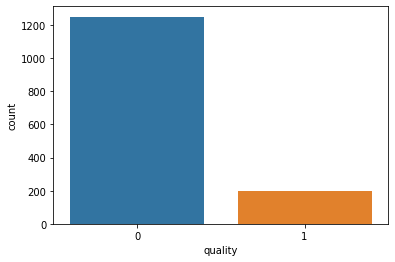

In [41]:
plt.figure(figsize=(6, 4))
sn.countplot(new_df['quality'])

**Handling class imbalanced data**

In [42]:
# Seprating features and target variable
x=new_df.drop("quality",axis=1)
y=new_df["quality"]

In [43]:
y.value_counts()

0    1250
1     201
Name: quality, dtype: int64

In [44]:
#Since wine quality belonging to category 1 have less samples so we will perform oversampling method to increse the samples
from imblearn.over_sampling import RandomOverSampler

In [45]:
os =  RandomOverSampler(random_state=0)
x_train_res, y_train_res = os.fit_resample(x, y)

In [46]:
x_train_res.shape, y_train_res.shape

((2500, 11), (2500,))

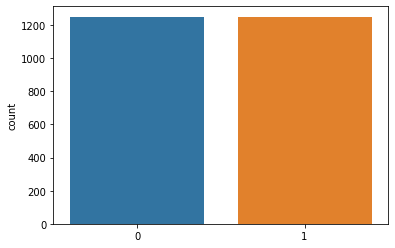

In [47]:
sn.countplot(y_train_res)

Now we have same number of good and bad quality of wine

**Splitting and training the data**

In [48]:
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

Finding the best random state

In [49]:
from sklearn.tree import DecisionTreeClassifier
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_train_res,y_train_res,test_size=0.3,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.9773333333333334 on random state 21


In [50]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_train_res,y_train_res,test_size=0.3,random_state=maxRS)

**Performing standard scaler technique**

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Applying classification algorithms on dataset**

In [52]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",acc)

Accuracy of Decision Tree classification is  0.9066666666666666


In [53]:
#Performing cross validation score
from sklearn.model_selection import cross_val_score
print("Cross validation score",cross_val_score(DTC,x,y,cv=5).mean())

Cross validation score 0.8083777698779476


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       368
           1       0.92      0.89      0.91       382

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750


 Confusion Matrix


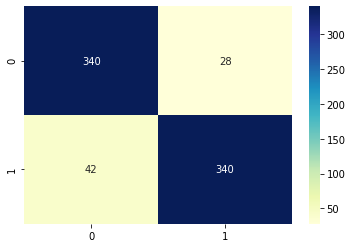

In [54]:
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
acc=classification_report(y_test,pred)
print(acc)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  0.98
Cross validation score 0.8049318639649247
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       368
           1       0.97      0.99      0.98       382

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750


 Confusion Matrix


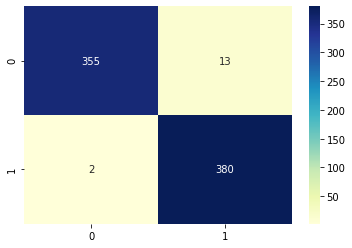

In [55]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",acc)
print("Cross validation score",cross_val_score(DTC,x,y,cv=5).mean())
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Support Vector Classification is  0.9173333333333333
Cross validation score 0.8628486787534069
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       368
           1       0.90      0.95      0.92       382

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750


 Confusion Matrix


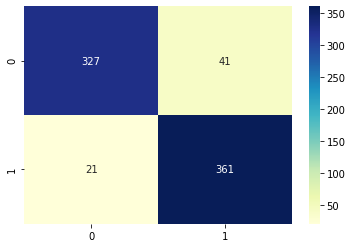

In [56]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=133)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",acc)
print("Cross validation score",cross_val_score(svc,x,y,cv=5).mean())
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy score using logistic regression model is 0.8373333333333334
Cross validation score 0.8738760516648891
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       368
           1       0.84      0.85      0.84       382

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750


 Confusion Matrix


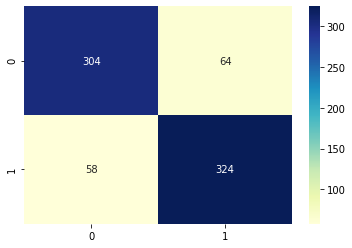

In [57]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',acc)
print("Cross validation score",cross_val_score(classifier,x,y,cv=5).mean())
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


In [72]:
model=['Decision Tree Classifier','Random Forest Classifier','Support Vector Classification','Logistic Regression']
acc=[90.66,98,91.73,83.73]
cv_score=[80.83,80.49,86.28,87.38]
diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],cv_score[3]-acc[3]]
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'CV_score':cv_score,'Diff':diff})
result


,Model,Accuracy_score,CV_score,Diff
0,Decision Tree Classifier,90.66,80.83,9.83
1,Random Forest Classifier,98.00,80.49,17.51
2,Support Vector Classification,91.73,86.28,5.45
3,Logistic Regression,83.73,87.38,3.65


**Applying hyperparameter tuning to the best accuracy model**

In [85]:
# Comparing all four algorithms least difference between accuracy_score and cross validation score is of Support vector Classification
from sklearn.model_selection import GridSearchCV

In [124]:
parameters={
              'C': [0.1,0.8,1.2,1.4],
              'kernel':['linear', 'rbf'],
              'gamma' :[0.1,0.3,0.5,0.8],
            'decision_function_shape' :['ovo','ovr']
           }

In [125]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 1.2, 1.4],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.1, 0.3, 0.5, 0.8],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [127]:
GCV.best_params_

{'C': 1.4, 'decision_function_shape': 'ovo', 'gamma': 0.8, 'kernel': 'rbf'}

In [130]:
Final_model=SVC(C=1.4,decision_function_shape='ovo',gamma=0.8,kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of the model using Support Vector classifier is ",acc*100)

Accuracy of the model using Support Vector classifier is  99.33333333333333


In [131]:
# Plotting Roc curve and roc_auc value
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,pred)
auc

0.9932065217391304

In [132]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [133]:
fpr

array([0.        , 0.01358696, 1.        ])

In [134]:
tpr

array([0., 1., 1.])

In [135]:
thresholds

array([2, 1, 0])

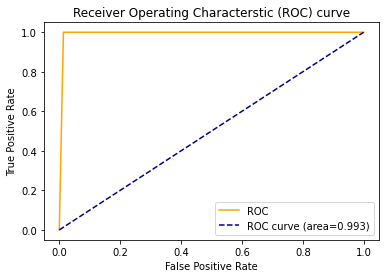

In [136]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Support vector classification gives highest accuracy on applying hyperparameter tuning of 99.3% 

**Saving the model**

In [137]:
from sklearn.externals import joblib

In [138]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']